# **Computer Vision - ENG301_Spring2023**

> **REPORT - ASSIGNMENT 1 - REPORT**


> **Group LaULon**


*   Nguyễn Thái Thảo Uyên
*   Nguyễn Thành Long
*   Phạm Hoàng Lân

# **PROGRAMMING LIBRARIES**

In [128]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
%pip install pyyaml

Note: you may need to restart the kernel to use updated packages.


# **I. THEORY**

## **Abbreviation**


1.   Homogenous Transformation Matrix: HMT
2.   Base Coordinate System: BCD



## **Prompt**

A workstation that includes a robotic arm and a camera is set up. The camera can see both the origin of the BCD of a robot arm and the centre of the object to be manipulated by the robot. If a coordinate system is established at the centre of the object, then the object seen by the camera can be expressed by the HTM $^{\mathrm{cam}}T_{\mathrm{obj}}$.

$$
^{\mathrm{cam}}T_{\mathrm{obj}} =\left\lbrack \begin{array}{cccc}
0 & 1 & 0 & 1\\
1 & 0 & 0 & 10\\
0 & 0 & -1 & 9\\
0 & 0 & 0 & 1
\end{array}\right\rbrack
$$

Similarly, the origin of the robot base coordinate system as seen by the camera can be represented by the HTM $^{\mathrm{cam}}T_{\mathrm{BCD}}$.

$$^{\mathrm{cam}}T_{\mathrm{BCD}} =\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & -10\\
0 & -1 & 0 & 20\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack$$

## **(a) After the equipment has been setup and these coordinate systems have been established, someone rotated the camera $90^°$ about the $z$ axis of the camera.**

### *Determine the position and orientation of the camera with respect to the robot's BCD*

To find **the HTM of the camera with respect to the robot's BCD** (denoted as $^{\mathrm{BCD}}T_{\mathrm{cam}}$)

> Caclulate the inverse of  $^{\mathrm{cam}}T_{\mathrm{BCD}}$

$$^{\mathrm{BCD}}T_{\mathrm{cam}} = ^{\mathrm{cam}}T_{\mathrm{BCD}}^{-1} =\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 10\\
0 & -1 & 0 & 20\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack$$

In [129]:
cam_T_BCD = np.array([[1, 0, 0, -10], [0, -1, 0, 20], [0, 0, -1, 10], [0, 0, 0, 1]])
BCD_T_cam = np.linalg.inv(cam_T_BCD)
print(BCD_T_cam)

[[ 1.  0.  0. 10.]
 [-0. -1. -0. 20.]
 [-0. -0. -1. 10.]
 [ 0.  0.  0.  1.]]


After rotating the camera $90^°$ about the $z$ axis of the camera, the rotated HTM ${}^{\mathrm{BCD}}_{\mathrm{rot90}}T_{\mathrm{cam}}$ can be found by multiplying the rotation matrix $R_{90_z}$ by the original HTM $^{\mathrm{BCD}}T_{\mathrm{cam}}$.


> The rotation matrix for $90^°$ about the $z$ axis of the camera is given by:

$$R_{90_z} =\left\lbrack \begin{array}{ccc}
\cos (90) & -\sin (90) & 0\\
\sin (90) & \cos (90) & 0\\
0 & 0 & 1
\end{array}\right\rbrack =\left\lbrack \begin{array}{ccc}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{array}\right\rbrack$$


> The HTM representing this rotation is:
$$T_{R_{90_z}} =\left\lbrack \begin{array}{cccc}
R_z  & d\\
0\;0\;0 & 1
\end{array}\right\rbrack =\left\lbrack \begin{array}{cccc}
0 & -1 & 0 & 0\\
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right\rbrack$$




$\Longrightarrow$ The HTM representing the camera with respect to the robot’s base coordinate system after the rotation is:

$${}^{\mathrm{BCD}}_{\mathrm{rot90}}T_{\mathrm{cam}} =^{\mathrm{BCD}}T_{\mathrm{cam}}* T_{R_{90_z}} =
\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 10\\
0 & -1 & 0 & 20\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
\left\lbrack \begin{array}{cccc}
0 & -1 & 0 & 0\\
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
=\left\lbrack \begin{array}{cccc}
0 & -1 & 0 & 10\\
-1 & 0 & 0 & 20\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack$$

In [130]:
BCD_T_cam = np.array([[1, 0, 0, 10], [0, -1, 0, 20], [0, 0, -1, 10], [0, 0, 0, 1]])
T_R90z = np.array([[0, -1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

BCD_T_cam_rot90 = np.dot(BCD_T_cam, T_R90z)

print(BCD_T_cam_rot90)

[[ 0 -1  0 10]
 [-1  0  0 20]
 [ 0  0 -1 10]
 [ 0  0  0  1]]


## **(b) After the rotation happened in (a), the object is also rotated $90^°$ about the $x$ axis of the object and translated by 4 units along the rotated $y$ axis.**

### *Determine the position and orientation of the object with respect to the robot's BCD*



To find the HTM form of the object with respect to the robot’s BCD (denoted as ${}^{\mathrm{BCD}}T_{\mathrm{obj}}$)

> Multiply $^{\mathrm{BCD}}T_{\mathrm{cam}}$ with $^{\mathrm{cam}}T_{\mathrm{obj}}$:

$$^{\mathrm{BCD}}T_{\mathrm{obj}} = ^{\mathrm{BCD}}T_{\mathrm{cam}} * ^{\mathrm{cam}}T_{\mathrm{obj}} 
=\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 10\\
0 & -1 & 0 & 20\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
\left\lbrack \begin{array}{cccc}
0 & 1 & 0 & 1\\
1 & 0 & 0 & 10\\
0 & 0 & -1 & 9\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
=\left\lbrack \begin{array}{cccc}
0 & 1 & 0 & 11\\
-1 & 0 & 0 & 10\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 1
\end{array}\right\rbrack$$



In [131]:
BCD_T_cam = np.array([[1, 0, 0, 10], [0, -1, 0, 20], [0, 0, -1, 10], [0, 0, 0, 1]])
cam_T_obj = np.array([[0, 1, 0, 1], [1, 0, 0, 10], [0, 0,-1 ,9], [0 ,0 ,0 ,1]])
BCD_T_obj = np.dot(BCD_T_cam, cam_T_obj)
print(BCD_T_obj)

[[ 0  1  0 11]
 [-1  0  0 10]
 [ 0  0  1  1]
 [ 0  0  0  1]]




> The HTM of the rotation matrix for a $90^°$ rotation about the $x$ axis is:

$$
T_{R_{90_x}} =\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{array}\right\rbrack \
$$


> The HTM of the translation matrix for a translation of 4 units along the $y$ axis is:

$$T_{{\mathrm{Tran}}_{4y}} =\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 4\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right\rbrack \
$$



> The HTM representing the presented matrices of rotation and translation:
$${}_{R_{90x} }T_{\mathrm{Tran4y}} = T_{R_{90_x}} * T_{{\mathrm{Tran}}_{4y}} =\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 4\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
=\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 1 & 0 & 4\\
0 & 0 & 0 & 1
\end{array}\right\rbrack$$



In [132]:
T_90z = np.array([[1, 0, 0, 0], [0, 0, -1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
T_tran4y = np.array([[1, 0, 0, 0], [0, 1, 0, 4], [0, 0 ,1 ,0], [0 ,0 ,0 ,1]])

T_90z_tran4y = np.dot(T_90z, T_tran4y)

print(T_90z_tran4y)

[[ 1  0  0  0]
 [ 0  0 -1  0]
 [ 0  1  0  4]
 [ 0  0  0  1]]


$⟹$ The new HTM form of the object with respect to the robot’s base coordinate system is:

$${}^{\mathrm{BCD}}_{\mathrm{moved}}T_{\mathrm{obj}} = 
^{\mathrm{BCD}}T_{\mathrm{obj}} * {}_{R_{90x} }T_{\mathrm{Tran4y}}
=\left\lbrack \begin{array}{cccc}
0 & 1 & 0 & 11\\
-1 & 0 & 0 & 10\\
0 & 0 & 1 & 1\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 1 & 0 & 4\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
=\left\lbrack \begin{array}{cccc}
0 & 0 & -1 & 11\\
-1 & 0 & 0 & 10\\
0 & 1 & 0 & 5\\
0 & 0 & 0 & 1
\end{array}\right\rbrack \
$$

In [133]:
BCD_T_obj = np.array([[0, 1, 0, 11], [-1, 0, 0, 10], [0, 0, 1, 1], [0, 0, 0, 1]])
T_90z_tran4y = np.array([[1, 0, 0, 0], [0, 0,-1 ,0], [0 ,1 ,0 ,4], [0 ,0 ,0 ,1]])

BCD_T_obj_moved = np.dot(BCD_T_obj, T_90z_tran4y)

print(BCD_T_obj_moved)

[[ 0  0 -1 11]
 [-1  0  0 10]
 [ 0  1  0  5]
 [ 0  0  0  1]]


### *Determine the position and orientation of the object with respect to the rotated camera coordinate system*

To find the HTM form of the rotated and translated object with respect to the rotated camera (denoted as ${}^{\mathrm{obj}}_{\mathrm{final}}T_{\mathrm{cam}}$).

> Calculate the inverse of ${}^{\mathrm{BCD}}_{\mathrm{rot90}}T_{\mathrm{cam}}$:

$${}^{\mathrm{cam}}_{\mathrm{rot90}}T_{\mathrm{BCD}}
={}^{\mathrm{BCD}}_{\mathrm{rot90}}T^{-1}_{\mathrm{cam}}
=\left\lbrack \begin{array}{cccc}
0 & -1 & 0 & 20\\
-1 & 0 & 0 & 10\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack
$$



In [134]:
BCD_T_cam_rot90 = np.array([[0, -1, 0, 10], [-1, 0, 0, 20], [0, 0, -1, 10], [0, 0, 0, 1]])

cam_T_BCD_rot90 = np.linalg.inv(BCD_T_cam_rot90)

print(cam_T_BCD_rot90)

[[-0. -1. -0. 20.]
 [-1. -0. -0. 10.]
 [-0. -0. -1. 10.]
 [ 0.  0.  0.  1.]]


$⟹$ To get the final result of ${}^{\mathrm{obj}}_{\mathrm{final}}T_{\mathrm{cam}}$

> Multiply ${}^{\mathrm{cam}}_{\mathrm{rot90}}T_{\mathrm{BCD}}$ with ${}^{\mathrm{BCD}}_{\mathrm{moved}}T_{\mathrm{obj}}$:

$${}^{\mathrm{obj}}_{\mathrm{final}}T_{\mathrm{cam}} 
= {}^{\mathrm{cam}}_{\mathrm{rot90}}T_{\mathrm{BCD}} * {}^{\mathrm{BCD}}_{\mathrm{moved}}T_{\mathrm{obj}}
=\left\lbrack \begin{array}{cccc}
0 & -1 & 0 & 20\\
-1 & 0 & 0 & 10\\
0 & 0 & -1 & 10\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
\left\lbrack \begin{array}{cccc}
0 & 0 & -1 & 11\\
-1 & 0 & 0 & 10\\
0 & 1 & 0 & 5\\
0 & 0 & 0 & 1
\end{array}\right\rbrack 
=\left\lbrack \begin{array}{cccc}
1 & 0 & 0 & 10\\
0 & 0 & 1 & -1\\
0 & -1 & 0 & 5\\
0 & 0 & 0 & 1
\end{array}\right\rbrack \
$$


In [135]:
cam_T_BCD_rot90 = np.array([[0, -1, 0, 20], [-1, 0, 0, 10], [0, 0, -1, 10], [0, 0, 0, 1]])
BCD_T_obj_moved = np.array([[0, 0,-1 ,11], [-1 ,0 ,0 ,10], [0 ,1 ,0 ,5], [0 ,0 ,0 ,1]])

obj_T_cam_final = np.dot(cam_T_BCD_rot90, BCD_T_obj_moved)

print(obj_T_cam_final)

[[ 1  0  0 10]
 [ 0  0  1 -1]
 [ 0 -1  0  5]
 [ 0  0  0  1]]


# **II. PROGRAMMING**

## **1. Camera Calibration**

> The purpose of this stage of the algorithm is to determine the camera calibration matrix and distortion coefficients using a collection of chessboard images. The resulting camera matrix is then utilized to obtain the focal length, which is necessary for performing undistortion in subsequent steps.

### <font style = "color:rgb(50,120,229)">Camera Calibration Workflow</font>


1. Import the folder of images using `glob.glob()` method. The folder specified for this assignment is `calib_images` which contains the photos we have taken using `Logitech C270 Webcam`.


2. As camera calibration requires an interactive optimization algorithm that minimises the reprojection error between the observed image points and the corresponding points in the calibration pattern. The `termination criteria` ensures that the algorithm stops when one or both of the specified minimum or maximum number of iterations desired accuracy threshold are met. TThe termination criteria is defined as:

```python
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
```

3. `Object points` are prepared, which will be the `(x, y, z) coordinates` of the real-life chessboard corners using the following line:

```python
objp = np.zeros((CHESSBOARD_CORNER_NUM_X*CHESSBOARD_CORNER_NUM_Y,3), np.float32)
```

**Note**: This step assumes that the chessboard is fixed on a (x, y) plane at z=0 for all calibration image. When taking pictures using the  Logitech C270 Webcam, we have also tried to keep the distance the same between the camera and the chessboard surface.
Thus, the object points should be the same for all calibration images, and will be stored into a list called `objpoints` every time the function successfully detect all chessboard corners in an image

```python
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
```

4. The corresponding `(x, y) pixel position` of each of the corners in the image plane will be added to a list called `imgpoints`. This is done in a for loop to detect the chessboard corner for all images in the specified folder.

**For-loop**: In this for-loop, the image is read by `cv.imread()`, and then converted to grayscale using `cv.cvtColor(img, COLOR_BGR2GRAY)`. Then, use `cv.findChessboardCorners()` and fill in the argument which contains the gray-scaled image, and chessboard number of corners on x and y-axis. After that, we will also draw and display the corners once the corners are detected using `cv.drawChessboardCorners()` and `cv.circle()`.

5. The results contained in `objpoints` and `imgpoints` will be used to compute the **camera calibration** and **distortion coefficients** using the `cv.calibrateCamera()` function. The camera matrix and distortion coefficient are the first and second outputs of the function if `ret boolean` is **True**, which indicates successful camera calibration.

<font style = "color:rgb(50,120,229)">Outputs: </font>
- `camMatrix` is a 3x3 camera matrix that represents the intrinsic parameters of the camera that allows mapping between pixel coordinates and camera coordinates in the image frame. 

$$K=\begin{bmatrix} f_x & 0 & o_x \\ 0 & f_y & o_y \\ 0 & 0 & 1\end{bmatrix}$$

> Camera matrix output:  
```python
[[1.36765522e+03 0.00000000e+00 5.19832883e+02]
 [0.00000000e+00 1.38533550e+03 4.70723395e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
```

The pixel focal length ($f_x$ anf $f_y$) obtained from the above matrix:

```python
fx_pix = int(camMatrix[0][0])
fy_pix = int(camMatrix[1][1])
```
And converted to `mm` using:

```python
fx_mm = fx_pix * sensor_width / img_w
fy_mm = fy_pix * sensor_width / img_w
```
The results give expected equal $f_x$ anf $f_y$ that are approximately 4mm. The accuracy can be proven by looking at the focal length of Logitech C270 Webcam provided in the specification

[**`Logitech C270 specification`**](https://inspectee.com/products/logitech-c270)

- `distortionCoeff` is a vector of distortion coefficients that represent the lens distortion of the camera, such as radial and tangential distortion. The obtained distortion parameters are:

```python
 [[-1.57409748e-01  1.16297429e+00 -2.34649913e-03  5.56333394e-03
  -3.03143617e+00]]
```

6. Performing undistortion: 

- Image distortion occurs due to the nonlinear relationship between image and object coordinates. To correct this, we use the camera matrix, which contains the camera’s intrinsic parameters such as focal length and principal point. 

- Using the camera matrix and distortion coefficients, we can compute a new camera matrix representing an ideal, undistorted image. This new matrix is used to generate remap maps that apply undistortion to the image. 

- The `cvundistort()` function will be used for **distortion correction** to the test image. Specifically, the algorithm begins by calculating a new camera matrix and a *region of interest (ROI)* using the `cv.getOptimalNewCameraMatrix()` function. 

- In this code, the ROI is set to be equal to `img.shape()` as the chessboard is moved to different (x,y) positions in the test images. The new camera matrix is then used to undistort the image by generating remap maps with `cv.initUndistortRectifyMap()` and applying them with `cv.remap()`. 

- The resulting undistorted image is saved to a file named **‘caliResult.png’** using `cv.imwrite()`. After saving the undistorted image as ‘caliResult.png’ in the designated folder, the code proceeds to repeat the process of finding chessboard corners in order to draw them on the image.


### <font style = "color:rgb(50,120,229)">Camera Calibration Demonstration</font>

> The below code is a Python script for camera calibration using a chessboard pattern. It reads a set of images containing a chessboard pattern, detects the corners of the chessboard in each image, and stores the corresponding 3D object points and 2D image points. These points can then be used to calibrate the camera and obtain the camera matrix and distortion coefficients, which can be saved to a file. The code also draws the chessboard corners and the four outer corners of the chessboard on each image for visualization purposes.

In [136]:
images = glob.glob('./calib_images/*.jpg')

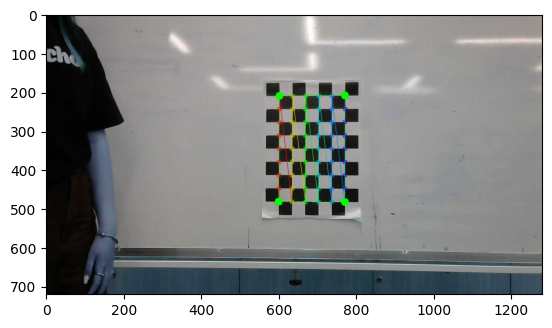

In [137]:
# Define the number of corners in the chessboard pattern
CHESSBOARD_CORNER_NUM_X = 9
CHESSBOARD_CORNER_NUM_Y = 6

# Define the output file for the camera parameters
CAMERA_PARAMETERS_OUTPUT_FILE = "cam1.yaml"

# Define the termination criteria for corner detection
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
# The Z-coordinate is 0 because the chessboard is assumed to lie in the XY plane
objp = np.zeros((CHESSBOARD_CORNER_NUM_X*CHESSBOARD_CORNER_NUM_Y,3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_CORNER_NUM_X,0:CHESSBOARD_CORNER_NUM_Y].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Loop over all the images in the specified directory
for fname in images:
    # Load the image and convert it to grayscale
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)
    
    # Define the corners
    BR_corner = corners[0, 0]
    BL_corner = corners[8, 0]
    TR_corner = corners[45, 0]
    TL_corner = corners[53, 0]
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), corners2, ret)
        
        # Draw 4 outer corners
        cv.circle(img, tuple(map(int, BR_corner)), 10, (0, 255, 0), -1)
        cv.circle(img, tuple(map(int, BL_corner)), 10, (0, 255, 0), -1)
        cv.circle(img, tuple(map(int, TR_corner)), 10, (0, 255, 0), -1)
        cv.circle(img, tuple(map(int, TL_corner)), 10, (0, 255, 0), -1)
        cv.line(img, tuple(map(int, BR_corner)), tuple(map(int, TR_corner)), (0,255,0), 1)
        cv.line(img, tuple(map(int, BL_corner)), tuple(map(int, TL_corner)), (0,255,0), 1)
        cv.line(img, tuple(map(int, BR_corner)), tuple(map(int, BL_corner)), (0,255,0), 1)
        cv.line(img, tuple(map(int, TR_corner)), tuple(map(int, TL_corner)), (0,255,0), 1)
        plt.imshow(img)

    else:
        print('Failed to find a chessboard in {}'.format(fname))

> Convert the focal length to mm

In [138]:
# Return the camera matrix
ret, camMatrix, distortionCoeff, rotationVectors, translationVectors = cv.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None)

# Displaying required output
print("\nCamera matrix:\n", camMatrix)
print("\nDistortion Parameters:\n", distortionCoeff)
# print("\nRotation Vectors:\n", rotationVectors)
# print("\nTranslation Vectors:\n", translationVectors)


Camera matrix:
 [[1.36765522e+03 0.00000000e+00 5.19832883e+02]
 [0.00000000e+00 1.38533550e+03 4.70723395e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Parameters:
 [[-1.57409748e-01  1.16297429e+00 -2.34649913e-03  5.56333394e-03
  -3.03143617e+00]]


In [139]:
# Extract the focal length in pixels from the camera's intrinsic matrix
fx_pix = int(camMatrix[0][0])
fy_pix = int(camMatrix[1][1])

# Print the focal length in pixels
print("fx in pixel: ", fx_pix)
print("fy in pixel: ", fy_pix)

# Get the image height, image width, and number of channels
img_h, img_w, channel = img.shape

# Set the camera sensor width (in mm)
sensor_width = 3.58

# Convert the focal length from pixels to mm
fx_mm = fx_pix * sensor_width / img_w
fy_mm = fy_pix * sensor_width / img_w

# Print the focal length in mm
print("fx in mm: ", round(fx_mm,2))
print("fy in mm: ", round(fy_mm,2))

fx in pixel:  1367
fy in pixel:  1385
fx in mm:  3.82
fy in mm:  3.87


> Produce Undistorted Images

In [140]:
# Loop through all the images in the 'images' list
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chessboard corners in the image using the findChessboardCorners function
    ret, corners = cv.findChessboardCorners(gray, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)
    
    # If the corners are found, proceed with undistorting the image
    if ret == True:
        
        # Get the height and width of the image
        h, w = img.shape[:2]

        # Calculate the optimal new camera matrix and region of interest (ROI) using the getOptimalNewCameraMatrix function
        newCamMatrix, roi = cv.getOptimalNewCameraMatrix(camMatrix, distortionCoeff, (w,h), 1, (w,h))

        # Apply the remapping to undistort the image using the initUndistortRectifyMap and remap functions
        mapx, mapy = cv.initUndistortRectifyMap(camMatrix, distortionCoeff, None, newCamMatrix, (w, h), 5)
        dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

        # Save the undistorted image to a file named 'caliResult.png'
        cv.imwrite('caliResult.png', dst)


> Connect the chessboard corners

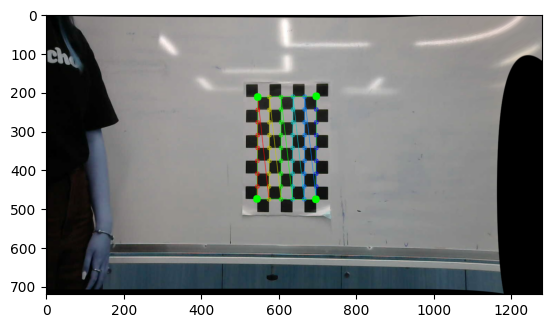

In [141]:
caliImg = cv.imread('caliResult.png')
caliGray = cv.cvtColor(caliImg, cv.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv.findChessboardCorners(caliGray, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)

# Define the corners
BR_corner = corners[0, 0]
BL_corner = corners[8, 0]
TR_corner = corners[45, 0]
TL_corner = corners[53, 0]

corners2 = cv.cornerSubPix(caliGray,corners, (11,11), (-1,-1), criteria)
# Draw and display the corners
cv.drawChessboardCorners(caliImg, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), corners2, ret)
# Draw 4 outer corners
cv.circle(caliImg, tuple(map(int, BR_corner)), 10, (0, 255, 0), -1)
cv.circle(caliImg, tuple(map(int, BL_corner)), 10, (0, 255, 0), -1)
cv.circle(caliImg, tuple(map(int, TR_corner)), 10, (0, 255, 0), -1)
cv.circle(caliImg, tuple(map(int, TL_corner)), 10, (0, 255, 0), -1)


cv.line(caliImg, tuple(map(int, BR_corner)), tuple(map(int, TR_corner)), (0,255,0), 1)
cv.line(caliImg, tuple(map(int, BL_corner)), tuple(map(int, TL_corner)), (0,255,0), 1)
cv.line(caliImg, tuple(map(int, BR_corner)), tuple(map(int, BL_corner)), (0,255,0), 1)
cv.line(caliImg, tuple(map(int, TR_corner)), tuple(map(int, TL_corner)), (0,255,0), 1)      
plt.imshow(caliImg)

(-0.5, 1279.5, 719.5, -0.5)

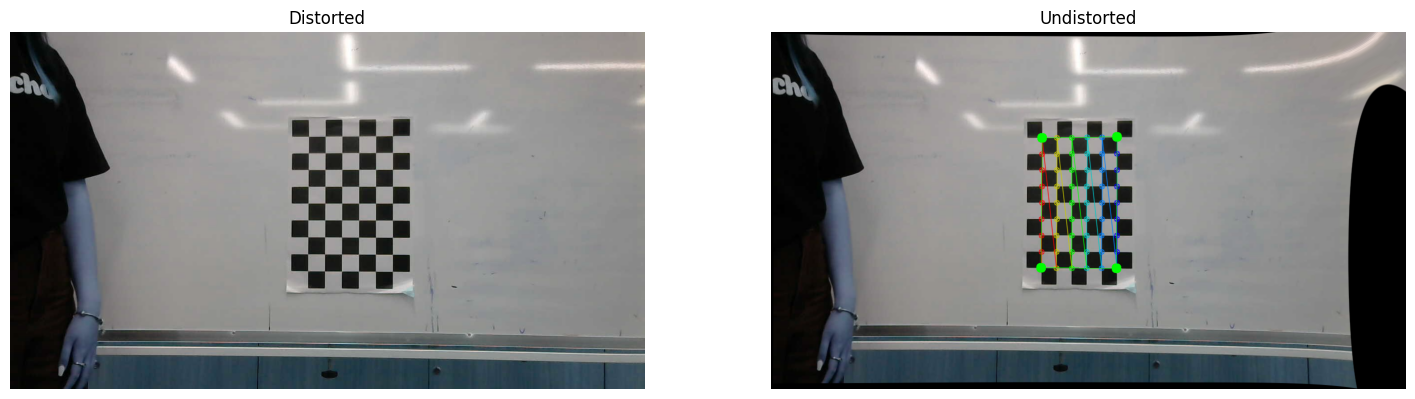

In [142]:
plt.figure(figsize = [18, 10])
plt.subplot(1,2,1); plt.imshow(img); plt.title("Distorted"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(caliImg); plt.title("Undistorted"); plt.axis('off')

## **2. Detection of midline and Calculation of camera position**

> At a high level, the pipeline takes these steps:

* Create a threshold for lane lines
* Selecting Region of Interest
* Detecting Edges using Canny Edge Detector
* Fit lines using Hough Line Transform
* Extrapolate the lanes from lines found
* Calculate the coordinate of midline of the lane 
* Calculate the distance between the middle point of the frame and the midline
* Composite the result original frame

### <font style = "color:rgb(50,120,229)">Pipeline Navigation</font>

1. [Helper functions](#functions)
2. [Convert to gray scale and create a threshold for lane lines](#threshold)
3. [Selecting Region of Interest](#roi)
4. [Detecting Edges using Canny Edge Detector](#canny)
5. [Fit lines using Hough Line Transform](#hough)
6. [Extrapolate the lanes from lines found and Calculate the Midline](#extrapolate)
7. [Calculate the distance between the middle point of the frame and the midline](#distance)
8. [Composite the result original frame](#composite)
<a id='threshold'></a>

### **(1) Helper functions**
<a id='functions'></a>

> Here are all the helper functions that we developed to serve our main function of ```process_image()```. Each function was documented in details of its function

In [143]:
def region_of_interest(img, vertices):
    """Select the region of interest (ROI) from a defined list of vertices."""
    # Create a blank mask image with the same size as the input image.
    mask = np.zeros_like(img)   
    
    # Define the color to fill the mask. It can be either a 3-channel or 1-channel color.
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # 3 or 4 depending on your image.
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    # Fill in pixels inside the polygon defined by the vertices.
    cv.fillPoly(mask, vertices, ignore_mask_color)
    
    # Apply the mask to the input image.
    masked_image = cv.bitwise_and(img, mask)
    
    # Return the masked image.
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """Utility function for drawing lines on an image."""
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                # Draw a line on the image using the given color and thickness.
                cv.line(img, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """Utility function for defining line segments using the Hough transform."""
    # Detect line segments in the input image using the Hough transform.
    lines = cv.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
    if lines is not None:
        print("HOUGH yes")
        # Create a blank image to draw the detected line segments on.
        line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
        # Draw the detected line segments on the blank image.
        draw_lines(line_img, lines)
        # Return the image with the detected line segments and the list of line segments.
        return line_img, lines
    
    # If no line segments are detected, return None.
    if lines is None:
        print('NO LINES')


def separate_left_right_lines(lines):
    """Separate the input lines into left and right lanes based on their slope."""
    left_lines = []
    right_lines = []
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                # Calculate the slope of the line.
                slope = (y1 - y2) / (x1 - x2)
                # Check if the slope is negative (left lane) or positive (right lane).
                if slope < 0:
                    left_lines.append([x1, y1, x2, y2])
                elif slope > 0:
                    right_lines.append([x1, y1, x2, y2])
    # Return the left and right lanes as separate lists.
    return left_lines, right_lines


def cal_avg(values):
    """Calculate the average of a list of values."""
    if values is None:
        return 0
    elif len(values) > 0:
        n = len(values)
        return sum(values) / n

def extrapolate_lines(lines, upper_border, lower_border):
    """Extrapolate lines keeping in mind the lower and upper border intersections.
    
    Args:
    - lines: a list of lines, each defined by four coordinates (x1, y1, x2, y2)
    - upper_border: the y-coordinate of the upper border of the region of interest (ROI)
    - lower_border: the y-coordinate of the lower border of the ROI
    
    Returns:
    - a list containing four coordinates (x1, y1, x2, y2) representing the extrapolated line
    """
    
    slopes = []  # list to store the slope of each line
    consts = []  # list to store the y-intercept of each line
    a = 0  # a counter
    
    # Loop through each line in the list of lines
    if (lines is not None) and (len(lines) != 0):
        for x1, y1, x2, y2 in lines:
            # If the line is vertical, add a small value to x2 to prevent division by zero
            if x1 == x2: 
                x2 = x2 + 1
            # Calculate the slope of the line
            slope = (y1-y2) / (x1-x2)
            # Add the slope to the list of slopes
            slopes.append(slope)
            # Calculate the y-intercept of the line
            c = y1 - slope * x1
            # Add the y-intercept to the list of y-intercepts
            consts.append(c)
                
        # Calculate the average slope and y-intercept
        avg_slope = cal_avg(slopes)
        avg_consts = cal_avg(consts)
        # If the average slope is zero, add a small value to prevent division by zero
        if avg_slope == 0: 
            avg_slope == avg_slope + 0.00001
        
        # Calculate the x-coordinate of the intersection of the extrapolated line with the lower border
        x_lane_lower_point = float((lower_border - avg_consts) / avg_slope)

        # Calculate the x-coordinate of the intersection of the extrapolated line with the upper border
        x_lane_upper_point = float((upper_border - avg_consts) / avg_slope)

        # Return the list of coordinates representing the extrapolated line
        return [x_lane_lower_point, lower_border, x_lane_upper_point, upper_border]
        
def extrapolated_lane_image(img, lines, roi_upper_border, roi_lower_border):
    """Main function called to get the final lane lines.
    
    Args:
    - img: the input image
    - lines: a list of lines, each defined by four coordinates (x1, y1, x2, y2)
    - roi_upper_border: the y-coordinate of the upper border of the region of interest (ROI)
    - roi_lower_border: the y-coordinate of the lower border of the ROI
    
    Returns:
    - lanes_img: a numpy array representing the final lane lines
    - mid_up: a tuple representing the upper midpoint of the lane
    - mid_down: a tuple representing the lower midpoint of the lane
    """
    
    # Create a blank image to store the final lane lines
    lanes_img = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
    
    # Separate the lines into left and right lanes
    lines_left, lines_right = separate_left_right_lines(lines)
    # Extract each lane.
    lines_left, lines_right = separate_left_right_lines(lines)
    lane_left = extrapolate_lines(lines_left, roi_upper_border, roi_lower_border)
    lane_right = extrapolate_lines(lines_right, roi_upper_border, roi_lower_border)

    # If both left and right lanes are detected
    if (lane_left is not None) and (lane_right is not None):
        # Draw the two lanes on the image
        draw_con(img, [[lane_left], [lane_right]])
        
        # Find the midpoint of the upper and lower lanes
        up_x = int((lane_left[2] + lane_right[2]) / 2)
        down_x = int((lane_left[0] + lane_right[0]) / 2)
        mid_up = (up_x, roi_upper_border)
        mid_down = (down_x,  roi_lower_border)
        
        # Draw the midline connecting the midpoint of the upper and lower lanes
        cv.line(img, mid_up, mid_down, [0, 0, 255], 3)
        
    # If only one lane is detected or neither is detected
    if (lane_left is None) or (lane_right is None):
        # Use default midpoint values
        mid_up = (640, 361)
        mid_down = (645, 360)
        
    # Draw a line on the image using the given color and thickness.
    cv.line(lanes_img, (int(lane_left[0]), int(lane_left[1])), (int(lane_left[2]), int(lane_left[3])), (255,0,0), 3)
    # Draw a line on the image using the given color and thickness.
    cv.line(lanes_img, (int(lane_right[0]), int(lane_right[1])), (int(lane_right[2]), int(lane_right[3])), (255,0,0), 3)
    
    return lanes_img, mid_up, mid_down

def draw_con(img, lines):
    """Fill in lane area."""
    points = []
    for x1,y1,x2,y2 in lines[0]:
        points.append([x1,y1])
        points.append([x2,y2])
    for x1,y1,x2,y2 in lines[1]:
        points.append([x2,y2])
        points.append([x1,y1])
     
    points = np.array([points], dtype = 'int32')  
        
    cv.fillPoly(img, points, (0,255,0))

def distance_from_center(mid_up, mid_down):
    # If mid_up or mid_down are None, set their values to the center of the image
    if (mid_up is None):
        mid_up = (640, 360)
    
    if (mid_down is None):
        mid_down = (640, 360)
    
    # If both mid_up and mid_down are not None, compute the distance between the midpoints
    if (mid_up is not None) and (mid_down is not None):
        # Compute the slope
        param = (mid_up[0] - mid_down[0])
        if(param == 0):
            param = param + 1
        else:
            m = (mid_up[1] - mid_down[1]) / param
            
            # Compute the y-intercept
            b = mid_up[1] - m * mid_up[0]

            # Compute the x-coordinate of the midpoint at the bottom of the image (where y = 480)
            mid_x = (480 - b) / m

            # Calculate the distance between the two midpoints in pixels
            dist_pixels = mid_x - 320

            # Calculate the distance between the two midpoints in millimeters using a conversion factor of 0.04285714 mm/pixel
            dist_mm = round(dist_pixels * 0.04285714 * 10, 3)
            
            # If the calculated distance is None, return None
            if dist_mm is None:
                return None
            
            # Otherwise, return the distance in millimeters
            return dist_mm, m

### (2) Read Image, Convert to gray scale, Blur and Apply threshold to lanes on two sides
<a id='threshold'></a>

> In this step, a threshold will be established for the purpose of detecting lane lines. This will be accomplished by first converting the image to gray scale and subsequently applying the threshold.

Text(0.5, 1.0, 'Threshold')

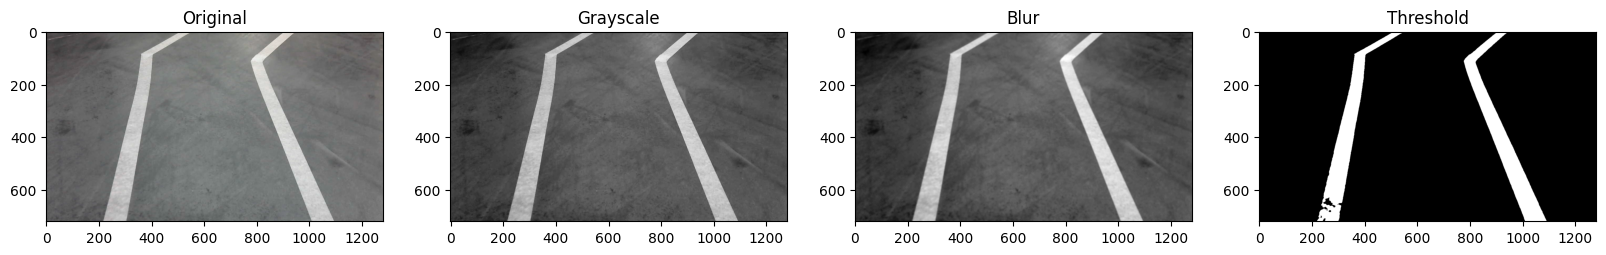

In [144]:
image = cv.imread('testing_image_Q2.jpg')
    
gray_select = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Remove noise using Gaussian blur.
kernel_size = 9
blur = cv.GaussianBlur(gray_select, (kernel_size, kernel_size), 0)

# Use global threshold based on grayscale intensity.
threshold = cv.inRange(blur, 180, 255)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,4,1); plt.imshow(image, cmap = 'gray');        plt.title('Original')
plt.subplot(1,4,2); plt.imshow(gray_select, cmap = 'gray');  plt.title('Grayscale')
plt.subplot(1,4,3); plt.imshow(blur, cmap = 'gray');         plt.title('Blur')
plt.subplot(1,4,4); plt.imshow(threshold, cmap = 'gray');    plt.title('Threshold')

### (3) Define Region of Interest
<a id='roi'></a>

> In this stage of the process, the region of interest will be selected based on the anticipated location of the lane lines. Any extraneous portions of the image will be masked out to facilitate accurate detection.

Text(0.5, 1.0, 'ROI')

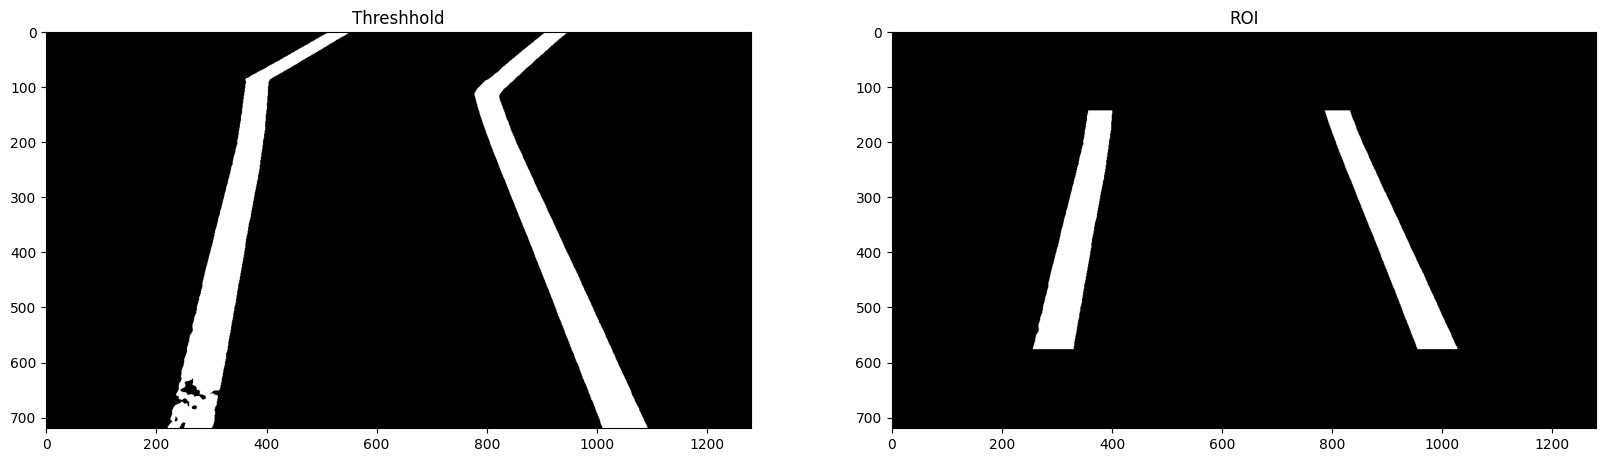

In [145]:
# Region masking: Select vertices according to the input image.
image_w = threshold.shape[1]
image_h = threshold.shape[0]

roi_vertices = np.array([[[0, 4*image_h/5],
                            [image_w, 4*image_h/5],
                            [image_w, image_h/5],
                            [0, image_h/5]]], dtype = np.int32)

gray_select_roi = region_of_interest(threshold, roi_vertices)

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(threshold, cmap = 'gray');      plt.title('Threshhold')
plt.subplot(1,2,2); plt.imshow(gray_select_roi, cmap = 'gray');  plt.title('ROI')

### (4) Perform Canny Edge Detection
<a id='canny'></a>

We will utilize the Canny Edge Detector to identify edges within the specified region of interest.

Text(0.5, 1.0, 'Canny Edge Detection')

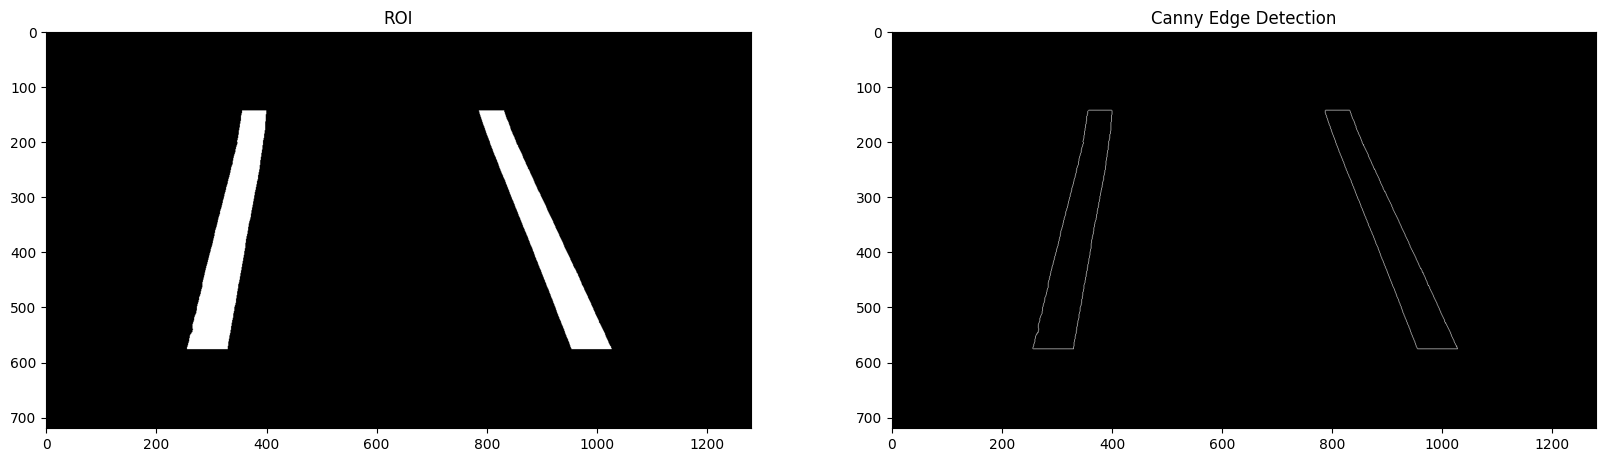

In [146]:
# Canny Edge Detection.
low_threshold = 50
high_threshold = 150
img_canny = cv.Canny(gray_select_roi, low_threshold, high_threshold)

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1); plt.imshow(gray_select_roi, cmap = 'gray');  plt.title('ROI')
plt.subplot(1,2,2); plt.imshow(img_canny, cmap = 'gray');        plt.title('Canny Edge Detection')

### (5) Fit lines using Hough Line Transform
We will perform image dilation and subsequently employ the Hough Line Transform to accurately fit lines to the identified edges.

<a id='hough'></a>

HOUGH yes


Text(0.5, 1.0, 'Hough lines')

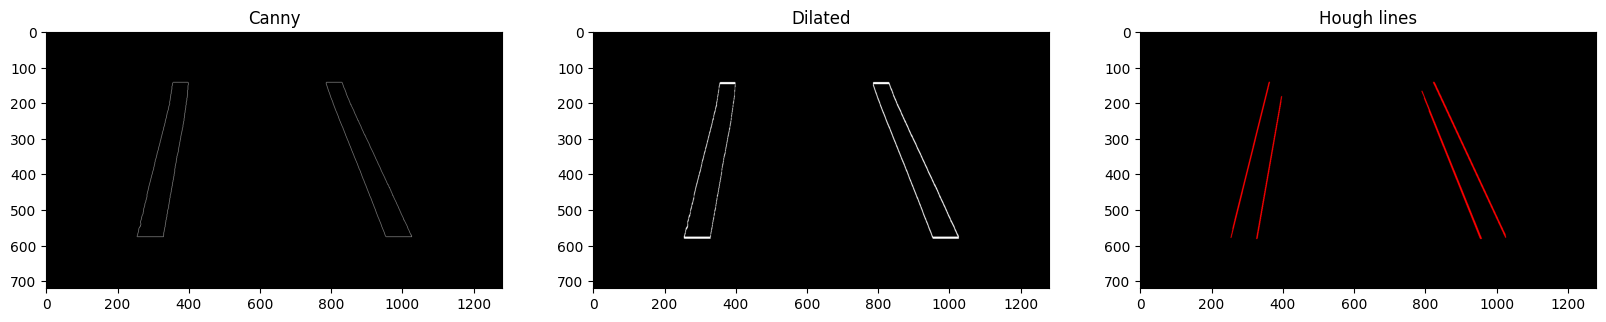

In [147]:
# Dilate edges to connect disconnected lines.
dilate = cv.dilate(img_canny, (5,5) , iterations=5)

# Apply Hough transform to detect lines in the image.
rho = 1
theta = np.pi/180
threshold = 150
min_line_len = 1
max_line_gap = 100
hough, lines = hough_lines(dilate, rho, theta, threshold, min_line_len, max_line_gap)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(img_canny, cmap = 'gray'); plt.title('Canny')
plt.subplot(1,3,2); plt.imshow(dilate, cmap = 'gray');    plt.title('Dilated')
plt.subplot(1,3,3); plt.imshow(hough, cmap = 'gray');     plt.title('Hough lines')

### (6) Extrapolate the lanes from identified Hough lines

We will extrapolate the left and right lanes from the lines identified using the Hough Line Transform. Additionally, within the `extrapolated_lane_image()` function, we will compute the coordinate of the midline.

<a id='extrapolate'></a>

Coordinate of the first point of the mid line is:  (577, 0)
Coordinate of the end point of the mid line is:  (659, 720)


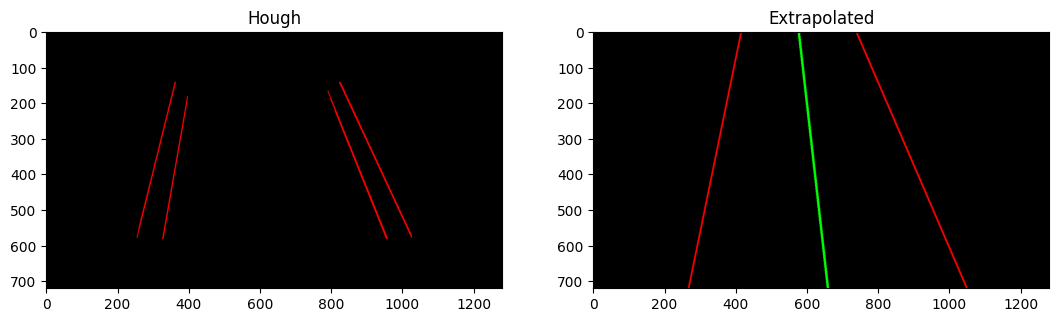

In [148]:
# Extrapolate detected lines to create lanes.
roi_upper_border = 0
roi_lower_border = image_h
lane_img, mid_up, mid_down = extrapolated_lane_image(image, lines, roi_upper_border, roi_lower_border)

cv.line(lane_img, mid_up, mid_down, (0,255,0), 5)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(hough, cmap = 'gray');    plt.title('Hough')
plt.subplot(1,3,2); plt.imshow(lane_img, cmap = 'gray'); plt.title('Extrapolated')

# Print the Mid-line Coordinate
print("Coordinate of the first point of the mid line is: ", mid_up)
print("Coordinate of the end point of the mid line is: ", mid_down)

### (7) Calculate the distance between the middle point of the frame and the midline

We will calculate the distance between the middle point of the frame and the midline to determine the position of the vehicle with respect to the lane.

<a id='distance'></a>

Distance:  133.571
Slope:  8.78048780487805


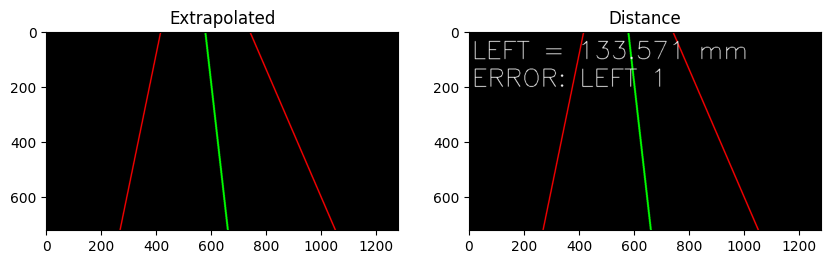

In [149]:
# Calculate distance of the lane from center and the slope of the mid line.
dist, m = distance_from_center(mid_up, mid_down)

plt.figure(figsize = (10,20))
plt.subplot(1,2,1); plt.imshow(lane_img, cmap = 'gray'); plt.title('Extrapolated')

# Display the distance from the center of the lane on the video feed.
if dist < 0 : 
    dist_mid = cv.putText(lane_img, f"RIGHT = {-dist} mm", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)
elif dist > 0 : 
    dist_mid = cv.putText(lane_img, f"LEFT = {dist} mm", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)
elif dist == 0 : 
    dist_mid = cv.putText(lane_img, f"CENTER = {dist} mm", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2) 
    
# Display the error from the center of the lane on the video feed.
if  15 < m <= 20 : 
    cv.putText(lane_img, f"ERROR: LEFT 3", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)
elif 10 < m <= 15 : 
    cv.putText(lane_img, f"ERROR: LEFT 2", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)
elif 2.5 < m <= 10 : 
    cv.putText(lane_img, f"ERROR: LEFT 1", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)
elif -2.5 < m <= 2.5 : 
    cv.putText(lane_img, f"ERROR: CENTER", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2) 
elif -10 < m <= -2.5  : 
    cv.putText(lane_img, f"ERROR: RIGHT 1", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)
elif -15 < m <= -10 : 
    cv.putText(lane_img, f"ERROR: RIGHT 2", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2) 
elif -15 < m <= -20 : 
    cv.putText(lane_img, f"ERROR: RIGHT 3", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (255,255,255), 2)

plt.subplot(1,2,2); plt.imshow(dist_mid, cmap = 'gray'); plt.title('Distance')

# Print the Mid-line Coordinate
print("Distance: ", dist)
print("Slope: ", m)

### (8) Composite the result original frame
Finally, we will composite the result with the original frame and display the final result.

<a id='composite'></a>

Text(0.5, 1.0, 'Result Image')

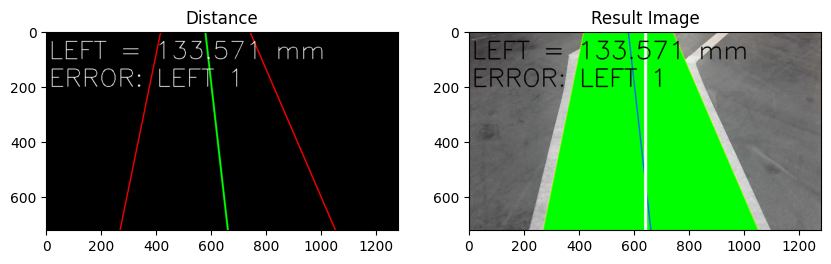

In [150]:
# Combine original image with lane image using weighted sum.
image_result = cv.addWeighted(image, 1, lane_img, 0.4, 0.0)

# Draw a white line at the center of the image.
center_line = [[[image_w/2,0,image_w/2,image_h]]]
draw_lines(image_result, center_line, color = [255,255,255], thickness = 10)

# Display the distance from the center of the lane on the video feed.
if dist < 0 : 
    cv.putText(image_result, f"RIGHT = {-dist} mm", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)
elif dist > 0 : 
    cv.putText(image_result, f"LEFT = {dist} mm", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)
elif dist == 0 : 
    cv.putText(image_result, f"CENTER = {dist} mm", (10, 100), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4) 
    
# Display the error from the center of the lane on the video feed.
if  15 < m <= 20 : 
    cv.putText(image_result, f"ERROR: LEFT 3", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)
elif 10 < m <= 15 : 
    cv.putText(image_result, f"ERROR: LEFT 2", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)
elif 2.5 < m <= 10 : 
    cv.putText(image_result, f"ERROR: LEFT 1", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)
elif -2.5 < m <= 2.5 : 
    cv.putText(image_result, f"ERROR: CENTER", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4) 
elif -10 < m <= -2.5  : 
    cv.putText(image_result, f"ERROR: RIGHT 1", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)
elif -15 < m <= -10 : 
    cv.putText(image_result, f"ERROR: RIGHT 2", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4) 
elif -15 < m <= -20 : 
    cv.putText(image_result, f"ERROR: RIGHT 3", (10, 200), cv.FONT_HERSHEY_SIMPLEX, 3, (0,0,0), 4)

plt.figure(figsize = (10,20))
plt.subplot(1,2,1); plt.imshow(dist_mid, cmap = 'gray'); plt.title('Distance')
plt.subplot(1,2,2); plt.imshow(image_result, cmap = 'gray'); plt.title('Result Image')

## **3. Deploy the developed program on Raspberry Pi 4 Model B**

> The real-time performance of the Raspberry Pi 4 Model B, in terms of the number of frames processed per second, is 25 fps. This is 5 fps lower than the default maximum frame rate of the Logitech C270 Webcam. However, there is no significant difference in the accuracy or lane detection capabilities when implementing the developed program on a laptop compared to a Raspberry Pi.

### <font style = "color:rgb(50,120,229)">Working with a mobile robot</font>

**<font style = "color:rgb(50,120,229)">System block </font>**
- Processors: Arduino Uno and Raspberry Pi 4 Model B
- Power supply:
  * 5V for Processors
  * 8V for DC motors 
- Input device: Logitech C270 Webcam
- Output devices:
  * DC motor driver L298N
  * DC motors

**<font style = "color:rgb(50,120,229)">Communication between Arduino and Raspberry Pi </font>**
- The Arduino processor is directly connected to the Raspberry Pi via a cable in order to receive serial commands decoded from the processed image.
- To establish communication between the Arduino and Raspberry Pi, the following Python code is incorporated into the script:

```python
import serial
port = '/dev/ttyUSB0'
arduino = serial.Serial(port, 9600, timeout=1)
```

**<font style = "color:rgb(50,120,229)">Fundamental ideas for controlling a robot </font>**

- The key idea of our robot controlling method is to consistently maintain the robot’s vision of the two lanes on both sides.
- The area of focus for the robot within the frame is divided into three distinct ranges:
  ```python
  midpoint = frame_width / 2
  a = 40
  range1 = [midpoint - a, midpoint + a]
  range2 = [range1[0] - a, range1[1] + a]
  range3 = [range2[0] - a, range2[1] + a]
  ```
- Based on each processed frame and the highest point obtained from the processed midline, the mobile robot will receive a command to self-adjust its position between the lanes and maintain its vision on top of the two lanes.
  ``` C++
  int speed = 80;
  int s = 10;
  ```
- The below operation chart visualizes how the two processors Arduino Uno and Raspberry Pi communicate with each other:

<img src="robot_control_flowchart.png" width="600" height="1000">

**<font style = "color:rgb(50,120,229)">Performance review </font>**

- Despite the simplicity of the robot control algorithm, the mobile robot has demonstrated the effectiveness of the program due to its straightforward tuning process and high success rate in completing 80% of the race in the Makerspace.

- The program may fail if the robot’s vision is no longer focused on the top of the two lanes. As a result, our robot struggles to successfully navigate the final turn of the race.